In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 顯示到小數點後第3位
%precision 3

'%.3f'

<AxesSubplot:>

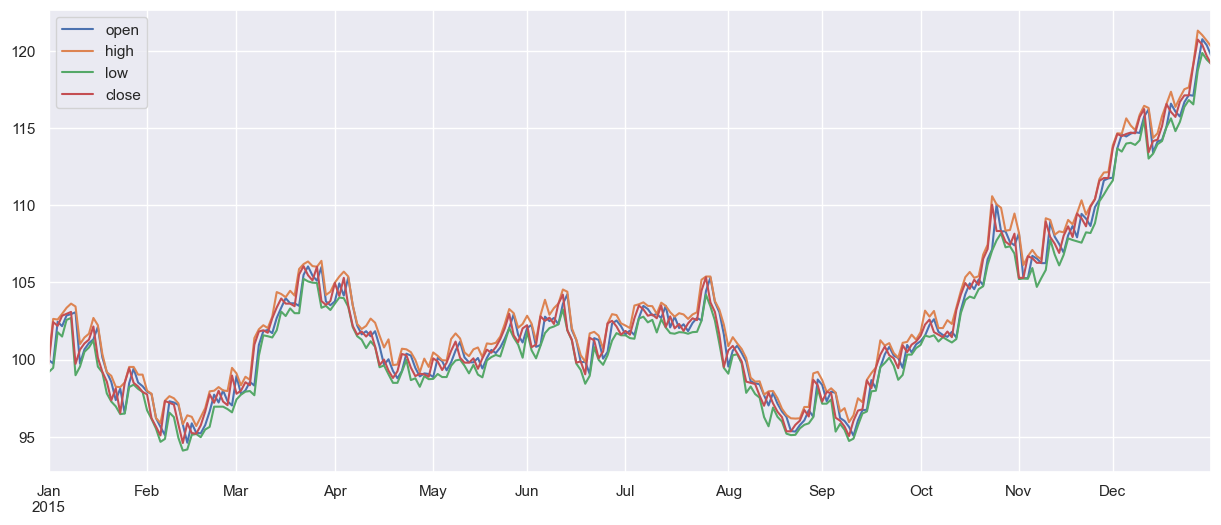

In [5]:
# 日期資料的設定。以freq='T'來生成1分鐘間隔的資料
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq = 'T')

# 產生亂數。讓它產生1 or -1
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# 製作隨機漫步（隨機增減數值的資料）
# np.comprod用來計算積之累積（第1個元素 * 第2個元素 * 第3個元素 * ．．．由此累積它們的和）
rnd_walk = np.cumprod(np.exp(dn * .0002)) * 100

# 以resample('B')將資料依營業日為單位來重新取樣
# 以ohlc方法讓他成為「open」、「high」、「low」、「close」這4筆資料
df = pd.Series(rnd_walk, index = idx).resample('B').ohlc()

df.plot(figsize = (15,6), legend = 'best', grid = True)

In [6]:
# plotly模組匯入
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF


init_notebook_mode(connected=True)

# K線設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates = df.index)
iplot(fig)